## Bibliotecas

In [1]:
import pandas
import matplotlib.pyplot as plot
import seaborn as sns
import numpy

## Lendo os Dados

In [2]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

### Variáveis importantes

In [3]:
tests = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_REDACAO']

dataset['NU_NOTA_TOTAL'] = dataset[tests].sum(axis=1)

students_without_zero_score = dataset.query('NU_NOTA_TOTAL != 0')

## Insights da Aula

### Variáveis

In [4]:
# Varíaveis funcionais ou independentes (x)
input_tests = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO']

# Varíavel dependente (y)
output_test = 'NU_NOTA_MT'

# Removendo notas NaN
students_without_zero_score = students_without_zero_score[tests].dropna()

input_scores = students_without_zero_score[input_tests]
output_score = students_without_zero_score[output_test]

input_scores, output_score

(        NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
 0            435.6       512.3       488.6            420.0
 2            423.2       499.1       441.0            560.0
 3            426.2       578.1       551.5            500.0
 4            516.5       571.3       511.2            780.0
 5            559.6       618.7       607.5            900.0
 ...            ...         ...         ...              ...
 127373       480.4       501.5       485.3            520.0
 127375       502.4       559.6       525.7            740.0
 127376       449.1       380.9       450.3            520.0
 127378       564.7       416.2       517.3            620.0
 127379       466.7       425.5       477.1            480.0
 
 [92537 rows x 4 columns], 0         432.4
 2         427.2
 3         499.9
 4         424.5
 5         615.6
           ...  
 127373    386.7
 127375    539.7
 127376    418.2
 127378    455.7
 127379    438.5
 Name: NU_NOTA_MT, Length: 92537, dtype: float64)

In [5]:
# Nomenclatura padrão
x = input_scores
y = output_score

In [6]:
from sklearn.model_selection import train_test_split

# Número aleatório para selecionar sempre os mesmos dados
SEED = 1313

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.25)


print(f"Notas no total: {len(x)} | Notas de treino: {len(x_train)} | Notas de teste: {len(x_test)}")

Notas no total: 92537 | Notas de treino: 69402 | Notas de teste: 23135


In [7]:
from sklearn.svm import LinearSVR

model = LinearSVR(random_state = SEED)

model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=1313, tol=0.0001, verbose=0)

In [8]:
math_predictions = model.predict(x_test)

In [9]:
y_test[:5]

36096     582.1
88033     421.9
98095     568.1
20686     391.8
116184    608.3
Name: NU_NOTA_MT, dtype: float64

Text(0, 0.5, 'Notas de Matemática')

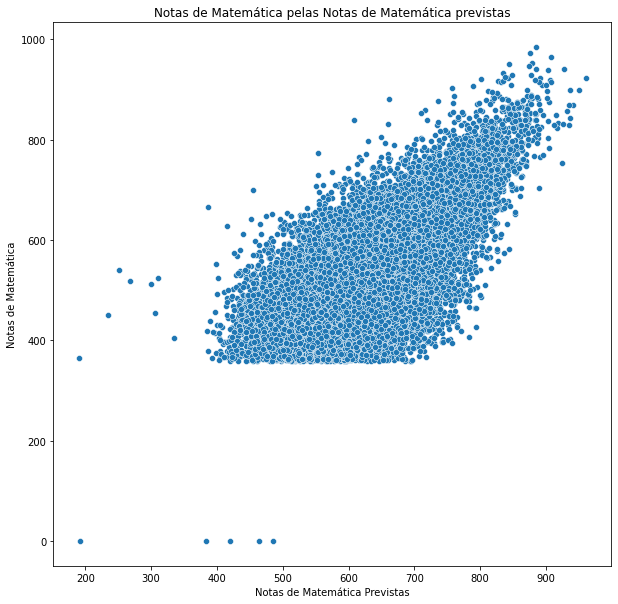

In [10]:
plot.figure(figsize=(10,10))

sns.scatterplot(x=math_predictions, y = y_test)
plot.title('Notas de Matemática pelas Notas de Matemática previstas')
plot.xlabel('Notas de Matemática Previstas')
plot.ylabel('Notas de Matemática')

(-50.0, 1050.0)

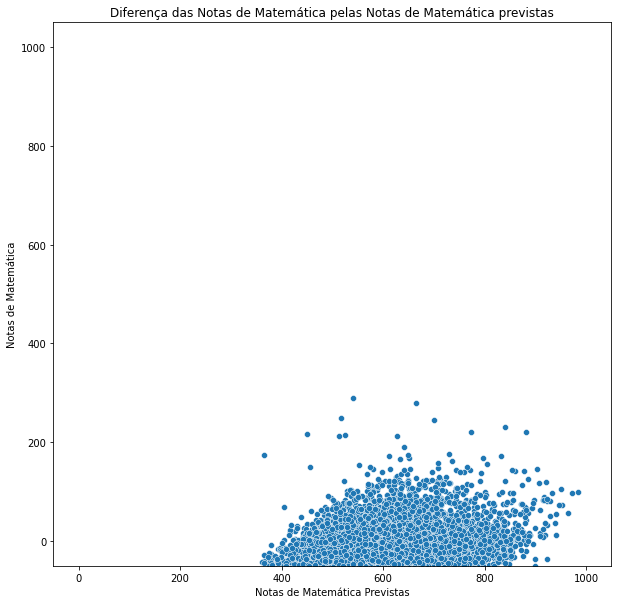

In [14]:
plot.figure(figsize=(10,10))

sns.scatterplot(x=y_test, y = y_test - math_predictions)
plot.title('Diferença das Notas de Matemática pelas Notas de Matemática previstas')
plot.xlabel('Notas de Matemática Previstas')
plot.ylabel('Notas de Matemática')

plot.ylim((-50, 1050))
plot.xlim((-50, 1050))


In [12]:
results = pandas.DataFrame()
results['Real'] = y_test
results['Previsao'] = math_predictions
results['Diferenca'] = results['Real'] - results['Previsao']
results['Quadrado_Diferenca'] = (results['Real'] - results['Previsao'])**2

results['Quadrado_Diferenca'].mean()**(1/2)

129.27882163874938

In [13]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor()
dummy_model.fit(x_train, y_train)

dummy_predictions = dummy_model.predict(x_test)

from sklearn.metrics import mean_squared_error

dummy_mean_error = mean_squared_error(y_test, dummy_predictions)
math_mean_error = mean_squared_error(y_test, math_predictions)

print(f'Erro médio "dummy": {dummy_mean_error} | Erro médio no modelo treinado: {math_mean_error}')

Erro médio "dummy": 12033.220071115518 | Erro médio no modelo treinado: 16713.013724303535
